In [81]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [82]:
path = "C:/Users/win10-zw/Desktop/myFile/FeigeDownload/LaneChange1/20180822-828-combine-1.avi"

In [83]:
# read video file 
def capture_video(path):
    cap = cv2.VideoCapture(path)
    frame_count = 1
    success = True
    video_frame =[]
    while(success):
        success, frame = cap.read()

        params = []
        params.append(1)
    #     cv2.imwrite("video" + "_%d.jpg" % frame_count, frame, params)
       
        video_frame.append(frame)
        frame_count = frame_count + 1
    cap.release()
    return video_frame
cap = capture_video(path)
# cap

In [84]:
#get all of the frames for the video
def color2gray(color_frame_array):
    frame = []
    
    for c in cap:
        if np.any(c)!=None:

            grey = cv2.cvtColor(c, cv2.COLOR_RGB2GRAY)
            frame.append(grey)
    return frame
gray_frame_array = color2gray(cap)

In [85]:
# gray_frame_array

In [86]:
# parameters of the camera
K = np.array([0,637.85,-61.51,22.2,-42.45,27.73])
k1 = K[1]
k3 = K[2]
k5 = K[3]
k7 = K[4]
k9 = K[5]
# Cx = 4
# Cy = 4
Cx = 648.33 
Cy = 357.42
centre = np.array([Cx,Cy])
asp = 1
# col
x_index =1280
# row
y_index = 720

In [87]:
def power(x, n): #如def power (x,n=2) 设置了n的默认值为2
    s = 1
    while n > 0:
        n = n - 1
        s = s * x
    return s

In [88]:
def get_map(K,Cx,Cy,x_index,y_index):
    #Map builing 
    correct_indexmap = {}
    #index of the new matrix, iterator, NEW image frame!!!!!!
    for gr_i in range(x_index):
        for gr_j in range(y_index):
            u = gr_i-x_index/2
            v = gr_j-y_index/2
            phi = np.arctan2(v,u)
            r = np.sqrt(pow(u,2)+pow(v,2)) 
            thita1 = math.pi/2
            R1 = (K[1])*thita1 + (K[2])*power(thita1,3) + (K[3])*power(thita1,5) + (K[4])*power(thita1,7) + (K[5])*power(thita1,9)
            f = R1//thita1
            thita = np.arctan2(r,f)
            R = (k1)*thita + (k3)*power(thita,3) + (k5)*power(thita,5) + (k7)*power(thita,7) + (k9)*power(thita,9)
    # get the map for storing the position

            correct_indexmap[int(gr_j),int(gr_i)] = (int(R*math.sin(phi)+ Cy))*1280+int(R*math.cos(phi)+Cx)

    #         origin_indexmap[gray_frame_array[int(R*math.sin(phi)+ Cy)][int(R*math.cos(phi)+Cx)]] = (int(R*math.sin(phi)+ Cy)-1)*1280+int(R*math.cos(phi)+Cx)
    #     return int(R*math.sin(phi)+ Cy)-1)*1280+int(R*math.cos(phi)+Cx
    print("f =",f," thita =",thita," phi =",phi," R =",R)
    # correct_indexmap
    map_array = np.empty(shape=(720,1280))
    # new_matrix = np.matrix(new_array)
    # new_array
    # np.argwhere(Matrix==k)
    for k, v in correct_indexmap.items():
    #     if  v == np.argwhere(Matrix==k):
    #     print(v)
        map_array[k] = v
    # new_array[0][0]=45
    return map_array

In [89]:
map_array = get_map(K,Cx,Cy,x_index,y_index)

f = 1011.0  thita = 0.6272859231102569  phi = 0.5118692076635096  R = 385.88270101607156


In [90]:
def undistortion_frame(map_array,y_index,x_index,gray_frame_array):
    gray_frame_array_f = gray_frame_array.flatten()
    undistortion_frame = np.empty(shape=(y_index,x_index))
# get index from the map
# for n in range(len(map_array)):
    for i in range(len(map_array)):
        for j in range(len(map_array[0])):
    #         undistortion_frame1 = gray_frame_array1[map_array[i][j]]
            undistortion_frame[i,j]= gray_frame_array_f[int(map_array[i][j])]
    return undistortion_frame

In [93]:
undistortion_graph = undistortion_frame(map_array,y_index,x_index,gray_frame_array[19])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


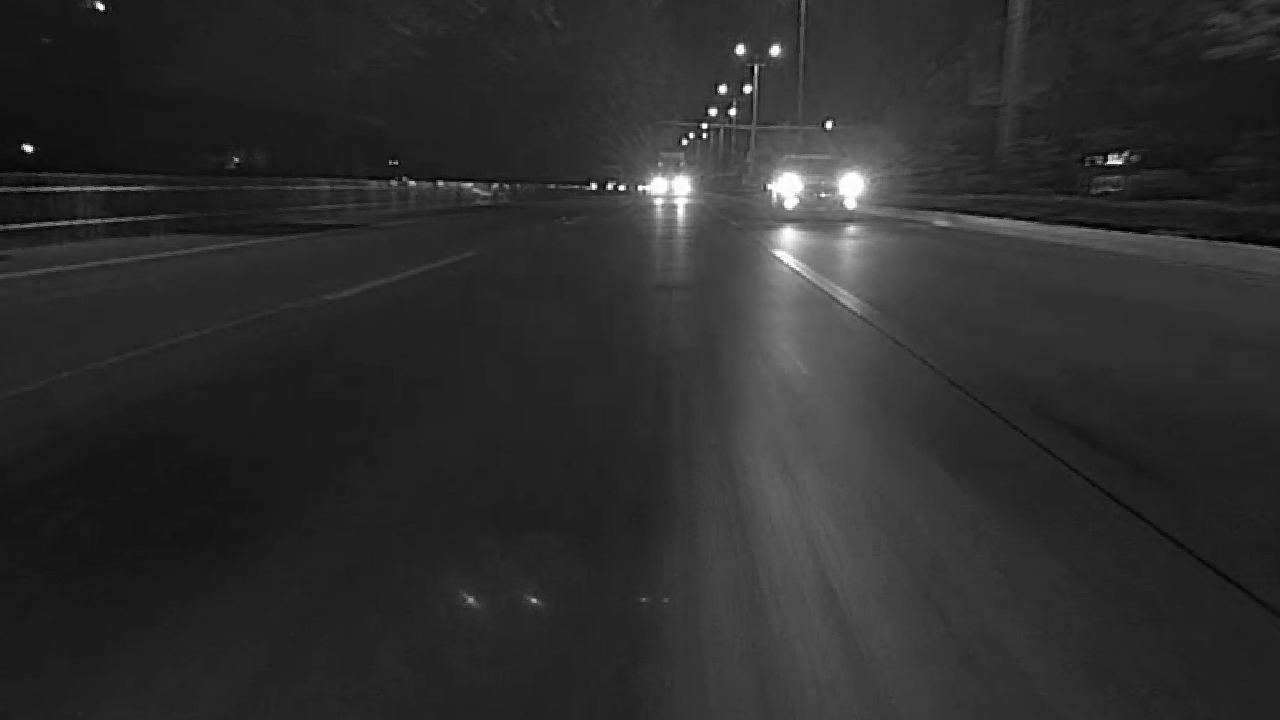

In [94]:
import scipy.misc
rgb = scipy.misc.toimage(undistortion_graph)
rgb